In [71]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as la
from matplotlib import pyplot as plot

## Reading the data
First we load the data from the npz file

In [72]:
data = np.load('data/data.npz')
x1 = data['x1']
x2 = data['x2']
y = data['y']

## Generating model
Then we use the same model as mentioned in the homework

In [73]:
f0 = np.ones(len(x1))
f1 = x1
f2 = np.multiply(x2, x2)  # x2^2
f3 = np.multiply(x1, f2)  # x1 * x2^2
X = np.column_stack((f0, f1, f2, f3))  # 1, x1, x2^2, x1 * x2^2 
y = np.transpose([y])

## Learning model parameters
We use two method to learn the paramters:
- Gradient Descent
- Stochastic Gradient Descent

As shown below, the Gradient Descent algorithm has a better result, but the overall performance of both algorithms are acceptably good.

In [74]:
beta_gd = [[1], [3], [2], [4]]
step = 0.0001

for i in range(10000):
    derivation = np.matmul(np.matmul(np.transpose(X), X), beta_gd) - np.matmul(np.transpose(X), y)
    beta_gd = np.subtract(beta_gd, np.multiply(step, np.multiply(1 / la.norm(derivation, 2), derivation)))

print('Beta from gradient descent is: ', beta_gd)
print('Beta error on train data: ', np.linalg.norm(np.matmul(X, beta_gd) - y))

('Beta from gradient descent is: ', array([[1.00000048],
       [2.99999412],
       [1.99998737],
       [3.99991683]]))
('Beta error on train data: ', 7.832811152084973)


In [104]:
alpha = 0.01
beta_sgd = np.ones(shape=(4, 1))
X_temp = np.zeros(shape=(1, 4))
X_temp_T = np.zeros(shape=(4, 1))
Y_temp = np.zeros(shape=(1, 1))

for i in range(10000):
    myRand = np.random.randint(0, 8000, size=1)
    X_temp[0] = X[myRand[0]]
    Y_temp[0] = y[myRand[0]]
    X_temp_T = np.transpose(X_temp)
    Grad = np.matmul(np.matmul(X_temp_T, X_temp), beta_sgd) - np.matmul(X_temp_T, Y_temp)
    Grad = Grad / np.linalg.norm(Grad)
    beta_sgd = np.add(beta_sgd, np.multiply(-alpha, Grad))
    
print('Beta from stochastic gradient descent is: ', beta_sgd)
print('Beta error on train data: ', np.linalg.norm(np.matmul(X, beta_sgd) - y))

('Beta from stochastic gradient descent is: ', array([[1.00114165],
       [3.00227158],
       [2.00451051],
       [3.99987275]]))
('Beta error on train data: ', 62.98019138773705)


## Testing the model and its parameters on the test data
First we read the test data from the npz file.

In [105]:
x1_t = data['x1_test']
x2_t = data['x2_test']
y_t = data['y_test']

## Generating test model
Then we generate the test model, the same model as used in the training phase.

In [106]:
f0_t = np.ones(len(x1_t))
f1_t = x1_t
f2_t = np.multiply(x2_t, x2_t)
f3_t = np.multiply(x1_t, f2_t)
X_t = np.column_stack((f0_t, f1_t, f2_t, f3_t))
y_t = np.transpose([y_t])

## Testing the learnt model paramters
Then we use the SSE metric for measuring our learnt parameters' performance.
As seen below, we plot the differences between the model predictions and the actual values in different colors on a 3D figure.
The first figure and SSE corresponds to the parameters learnt with the gradient descent algorithm and the second one corresponds to the stochastic gradient descent algoirthm.

('SSE for gradient descent:', 5.931244557962708)


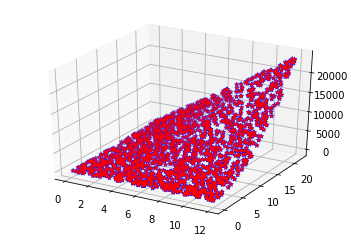

In [107]:
test_error = np.subtract(y_t, np.matmul(X_t, beta_gd))
print("SSE for gradient descent:", la.norm(test_error, 2))

fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
xs = x1_t
ys = x2_t
ax.scatter(xs, ys, np.matmul(X_t, beta_gd), c='b', marker='*')
ax.scatter(xs, ys, y_t, c='r', marker='.')
plot.show()

('SSE for stochastic gradient descent:', 37.726573541496286)


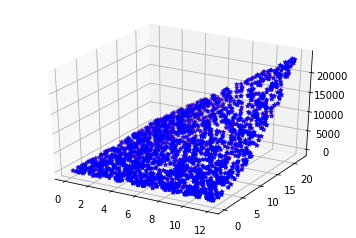

In [108]:
test_error = np.subtract(y_t, np.matmul(X_t, beta_sgd))
print("SSE for stochastic gradient descent:", la.norm(test_error, 2))

fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
xs = x1_t
ys = x2_t
ax.scatter(xs, ys, np.matmul(X_t, beta_sgd), c='b', marker='*')
ax.scatter(xs, ys, y_t, c='r', marker='.')
plot.show()